In [1]:
import cv2
import os


In [6]:

def generate_dataset():
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
         
        
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
     
    cap = cv2.VideoCapture(0)
    img_id = 0
     
    while True:
        ret, frame = cap.read()
        
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            filepath = os.path.join('data','tarun.'+str(img_id)+'.jpg')
            if os.path.exists(filepath):
                os.makedirs(filepath)
            cv2.imwrite(filepath, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
             
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==100:
                break
                 
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")
generate_dataset()

In [11]:
import numpy as np

In [20]:
def label(img_name):
    name = img_name.split('.')[-3]
    print(name)
    if name == 'username':
        return np.array([1,0])
    elif name == 'tarun':
        return np.array([0,1])

In [9]:
!pip install tqdm

You should consider upgrading via the 'd:\programs\face_recognization_system\frec1\scripts\python.exe -m pip install --upgrade pip' command.


In [21]:
import os
from random import shuffle
from tqdm import tqdm

In [25]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path = os.path.join('data',img)
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),label(img)])
        shuffle(data)
    return data

In [26]:
data = my_data()

 10%|████████▍                                                                       | 21/200 [00:00<00:00, 203.87it/s]

tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun


 32%|██████████████████████████                                                      | 65/200 [00:00<00:00, 191.74it/s]

tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun


 54%|██████████████████████████████████████████▋                                    | 108/200 [00:00<00:00, 191.67it/s]

tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
tarun
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username


 76%|████████████████████████████████████████████████████████████                   | 152/200 [00:00<00:00, 202.45it/s]

username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 201.91it/s]

username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username
username


In [62]:
train = data[:75]
test = data[75:]
x_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
Y_train = np.array([i[1] for i in train])
x_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
y_test = np.array([i[1] for i in test])
x_train.shape,x_test.shape

((75, 50, 50, 1), (125, 50, 50, 1))

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer,Conv2D,MaxPooling2D,Dense,Input,Flatten
from tensorflow.keras.layers.experimental import preprocessing

In [103]:
input_shape = (50,50,1)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = Input(shape=input_shape,name="input_layer")
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D(name="average_pooling")(x)
outputs = layers.Dense(2,activation="softmax",name="output_layer")(x)

model_2 = keras.Model(inputs,outputs)
c1 = Conv2D(32,(10,10),activation='relu')(inputs)

m1 = MaxPooling2D(64,(2,2),padding="same")(c1)
  # second block
c2 = Conv2D(64,(7,7),activation="relu")(m1)
m2 = MaxPooling2D(64,(2,2),padding="same")(c2)
  # third layer
c3 = Conv2D(64,(4,4),activation="relu")(m2)
m3 = MaxPooling2D(32,(2,2),padding="same")(c3)

f1 = Flatten()(c3)
c6 = Dense(2,activation="softmax",name="output_layer")(f1)

model_1 = keras.Model(inputs,c6)
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer = keras.optimizers.Adam(),
    metrics=["accuracy"]
)


In [104]:
model_1.evaluate(x_test,y_test)

4/4 [==============================] - 1s 144ms/step - loss: 15.1337 - accuracy: 0.5200


[15.133711814880371, 0.5199999809265137]

In [63]:
len(x_train),len(Y_train)

(75, 75)

In [107]:
history = model_1.fit(x_train,Y_train,epochs=12,validation_data=(x_test,y_test))

Epoch 1/12
3/3 [==============================] - 3s 940ms/step - loss: 0.0765 - accuracy: 0.9467 - val_loss: 0.0427 - val_accuracy: 0.9680
Epoch 2/12
3/3 [==============================] - 3s 1s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3/12
3/3 [==============================] - 4s 1s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 4/12
3/3 [==============================] - 4s 1s/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/12
3/3 [==============================] - 4s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/12
3/3 [==============================] - 4s 1s/step - loss: 7.7590e-04 - accuracy: 1.0000 - val_loss: 5.4294e-04 - val_accuracy: 1.0000
Epoch 7/12
3/3 [==============================] - 4s 1s/step - loss: 3.2189e-04 - accuracy: 1.0000 - val_loss: 1.9335e-04 - val_accuracy: 1.0000
Epoch 8/12
3/3 [======

In [91]:
!pip install matplotlib


You should consider upgrading via the 'd:\programs\face_recognization_system\frec1\scripts\python.exe -m pip install --upgrade pip' command.


In [96]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("data")):
        path = os.path.join("data", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata


In [97]:
import matplotlib.pyplot as plt
Vdata = data_for_visualization()
Vdata

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 2755.97it/s]


[[array([[174, 174, 173, ..., 206, 213, 214],
         [173, 175, 174, ..., 196, 210, 214],
         [174, 174, 173, ..., 201, 212, 214],
         ...,
         [118, 117, 116, ..., 187, 188, 185],
         [114, 112, 111, ..., 187, 187, 186],
         [106, 103, 101, ..., 184, 186, 188]], dtype=uint8),
  'username'],
 [array([[174, 173, 174, ..., 213, 211, 215],
         [175, 172, 174, ..., 213, 215, 213],
         [172, 171, 174, ..., 213, 213, 213],
         ...,
         [ 91,  88,  77, ..., 185, 185, 184],
         [ 61,  35,  47, ..., 182, 181, 182],
         [ 20,  37,  20, ..., 177, 179, 178]], dtype=uint8),
  'username'],
 [array([[ 80,  35,  28, ..., 204, 200, 199],
         [ 51,  29,  23, ..., 194, 201, 202],
         [ 35,  28,  26, ..., 192, 203, 204],
         ...,
         [115, 123, 127, ..., 186, 186, 184],
         [112, 119, 124, ..., 183, 183, 182],
         [105, 108, 113, ..., 180, 183, 182]], dtype=uint8),
  'tarun'],
 [array([[ 59,  22,  10, ..., 155, 154, 152

1/1 [==============================] - 0s 31ms/step


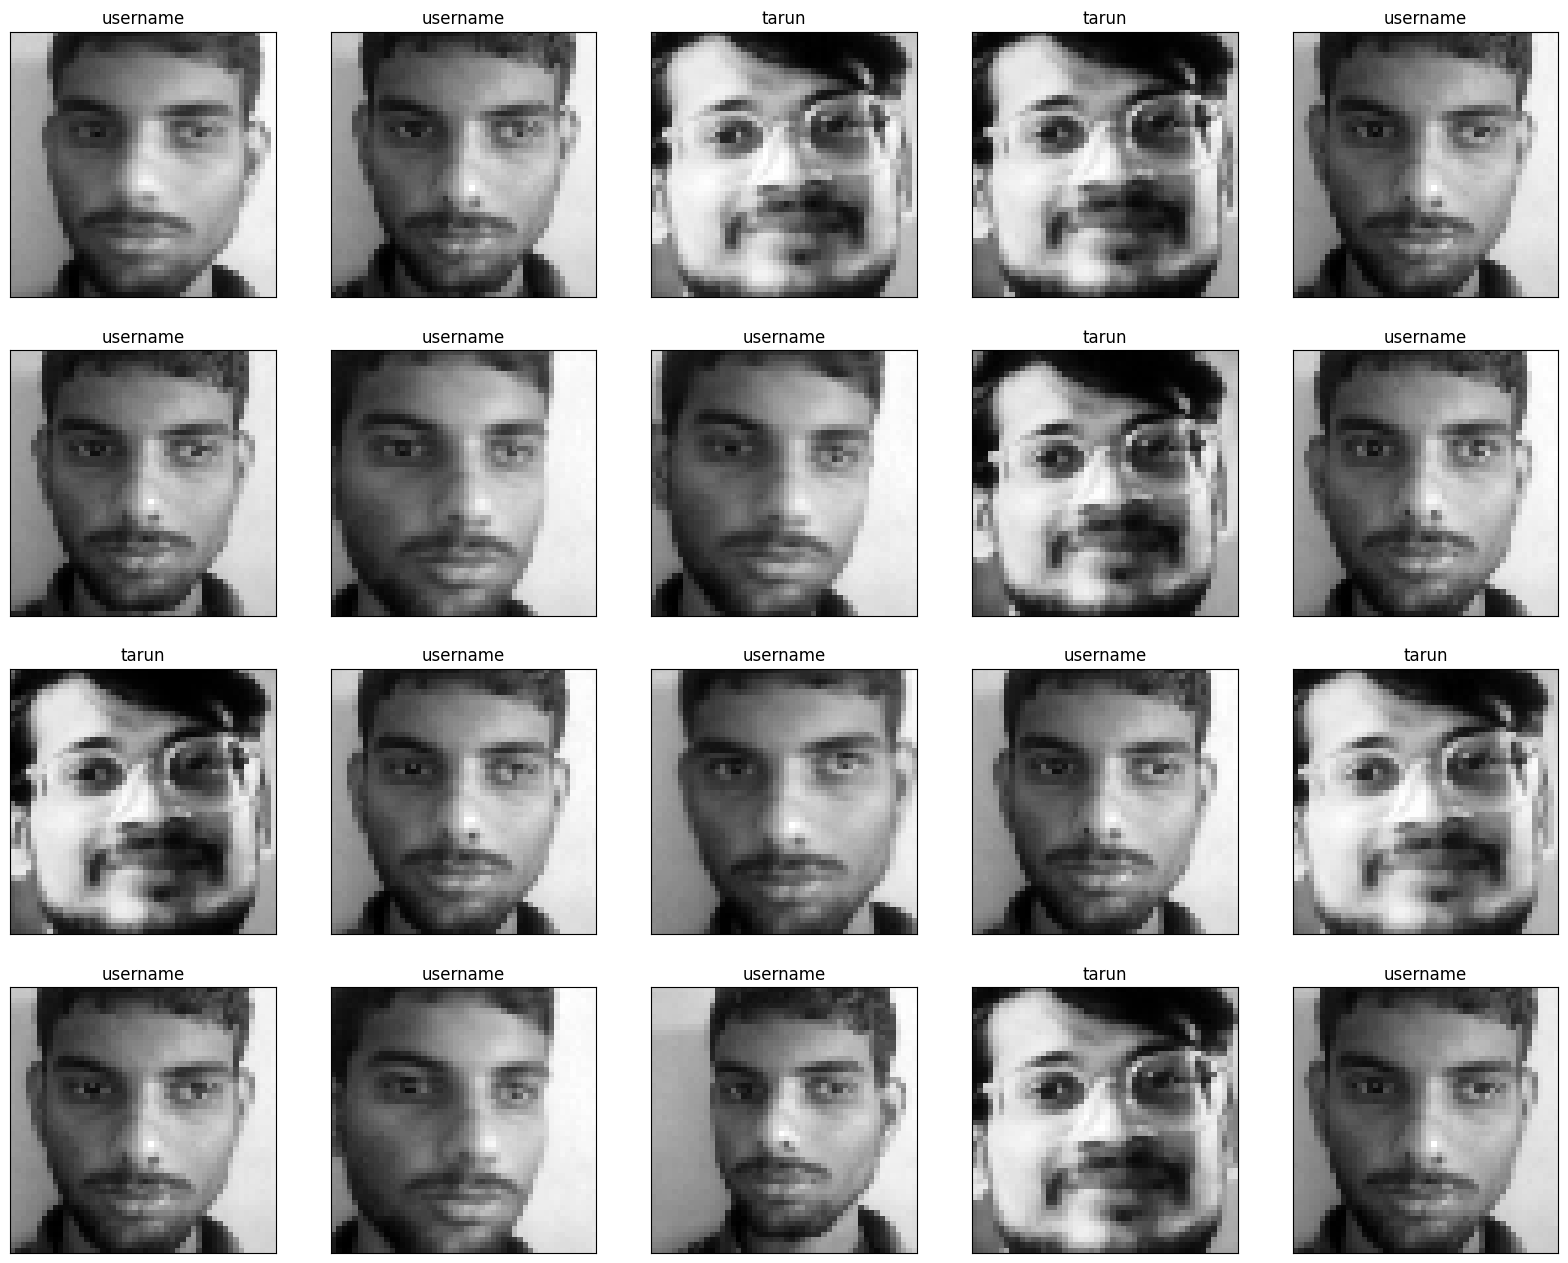

In [108]:
 
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model_1.predict(tf.expand_dims(data,axis=0))
     
    if np.argmax(model_out) == 0:
        my_label = 'username'
    elif np.argmax(model_out) == 1:
        my_label = 'tarun'
    y.imshow(image, cmap='gray')
    plt.title(my_label)
     
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
